# Neural Networks




# Overview

**Neural Network:** A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature. 

**Approach and Objective of the workbook:**

The primary objective of this workbook is to learn and implement the neural networks with 2 layers. 

In this workbook, first we clean and preprocess the data and then perform visualizations using plots and graphs on the data to understand the trends, patterns and  to find the relationships among the features of in the data, before performing the regression and classification using Neural Networks. From this workbook, we will get a complete understanding of the structure of neural networks, how it works, what are the important parameters that can affect our outputs and most crucially how to calculate the weights of all the layers(one hidden and output layer in our case).

Following are the two algorithms that that will implemented with Neural Networks in this workbook:

Non-Linear Regression

Non-Linear Logistic Regression

Apart from just implementing neural networks, we will be implementing a regularization technique which is Cross Validation to deal with the problem of Underfitting and Overfitting. In this part, we will also tune our model with different set of hyperparameters for all validation, test sets and come up with the best set of parameters according to the score calculated each time we run our model.


# Data

# Regression

## Description 

Data is the snapshot of Melbourne Housing Dataset and is taken from Kaggle.This dataset is created by Tony Pino.It was scraped from publicly available results posted every week from Domain.com.au. Tony Pino cleaned it well, and uploaded it in Kaggle. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

Data Source: Tony Pino, Domain.com.au,"Snapshot of Tony Pino's Melbourne Housing Dataset", https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

**Features of the data:**

Suburb: Suburb in Melbourne

Address: Address of the property

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Postcode: Postcode of housing

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

YearBuilt: Year in which property is built 

CouncilArea: Governing council for the area

Latitude: Latitude of the property

Longitude: Longitude of the property

# Classification

## Description

Data is the Mushroom Classification Dataset and is taken from Kaggle.This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Data Source:
G. H. Lincoff (Pres.), Alfred A. Knopf, Jeff Schlimmer (data donor), The Audubon Society Field Guide to North American Mushrooms (1981), https://www.kaggle.com/uciml/mushroom-classification

**Features of the data:**

Data contains the following variables

(classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Reading of the data

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from nn import NeuralNet
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score

In [2]:
# Regression data read-in

data_regression = pd.read_csv("melb_data.csv")


In [3]:
# Classification data read-in

data_classification = pd.read_csv("mushrooms.csv")


## Summary of Regression data

In [4]:
# Summary of the data
print(data_regression.shape)

#Structure of the data
data_regression.info()

# Description of the data
data_regression.describe()

#Checking missing values in the data
data_regression.isna().sum()

(13580, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
#Identifying the numerical variables.

data_regression.select_dtypes(include=[np.number]).columns


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [6]:
#Identifying categorical values 

data_regression.select_dtypes(exclude=np.number).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

### Preprocessing data for analysis (Handling missing values)

In [7]:
#  Handling missing values considering median

data_regression['Car'].fillna(np.nanmedian(data_regression['Car']), inplace=True)
data_regression['YearBuilt'].fillna(np.nanmedian(data_regression['YearBuilt']), inplace=True)
data_regression['BuildingArea'].fillna(np.nanmedian(data_regression['BuildingArea']), inplace=True)
data_regression['CouncilArea'].fillna(data_regression['CouncilArea'].value_counts().index[0], inplace=True)
data_regression.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [8]:
# Calculating skewness

data_regression.skew()

Rooms              0.376478
Price              2.239624
Distance           1.676937
Postcode           4.076152
Bedroom2           0.774082
Bathroom           1.377406
Car                1.366017
Landsize          95.237400
BuildingArea     107.128531
YearBuilt         -2.173996
Lattitude         -0.426695
Longtitude        -0.210991
Propertycount      1.069339
dtype: float64

## Plots for understanding or analysis of Regression data

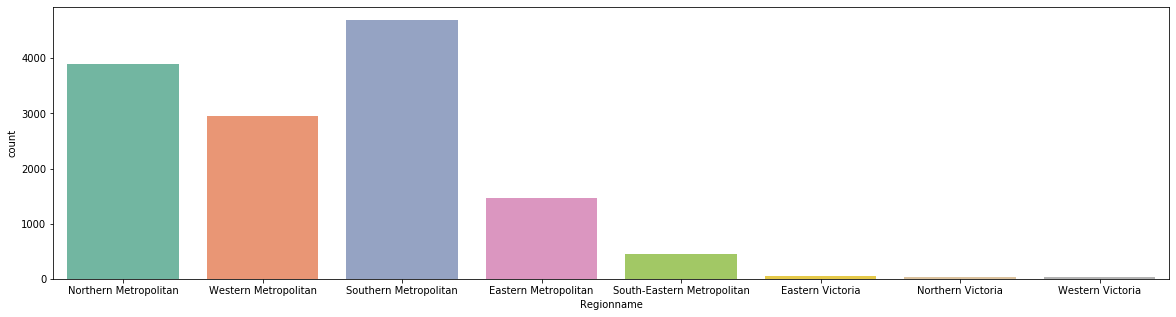

In [9]:
# Count plot for Regionname

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(x='Regionname',data=data_regression, palette="Set2")

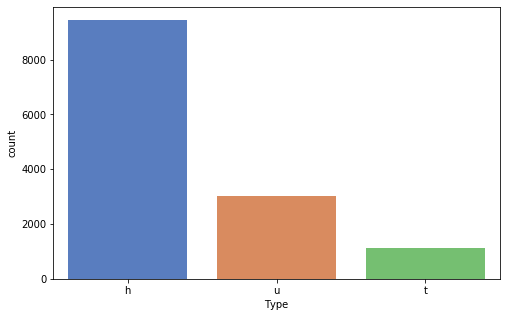

In [10]:
# Count plot for Type of the property

plt.figure(figsize=(8,5))
sns.countplot(x='Type',data=data_regression, palette="muted")


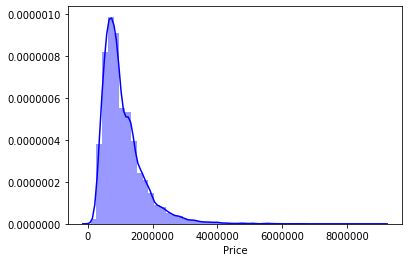

In [11]:
# Dist Plot for price

sns.distplot(data_regression['Price'],color='blue')


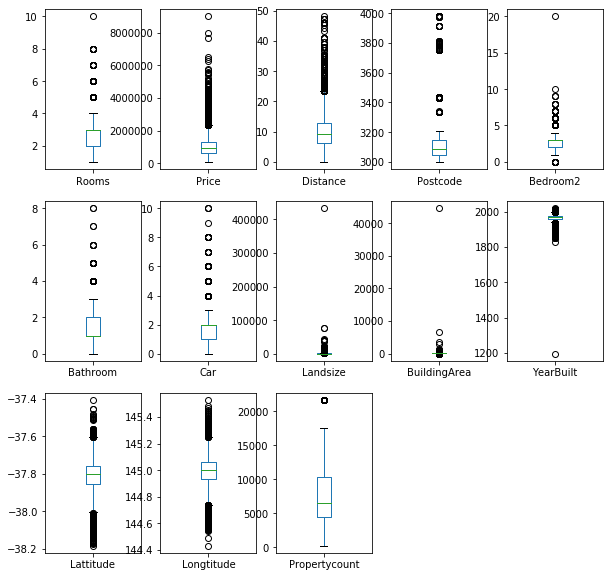

In [12]:
# Finding outliers 

from matplotlib.patches import Polygon

data_regression.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False,figsize=(10,10))
plt.show()

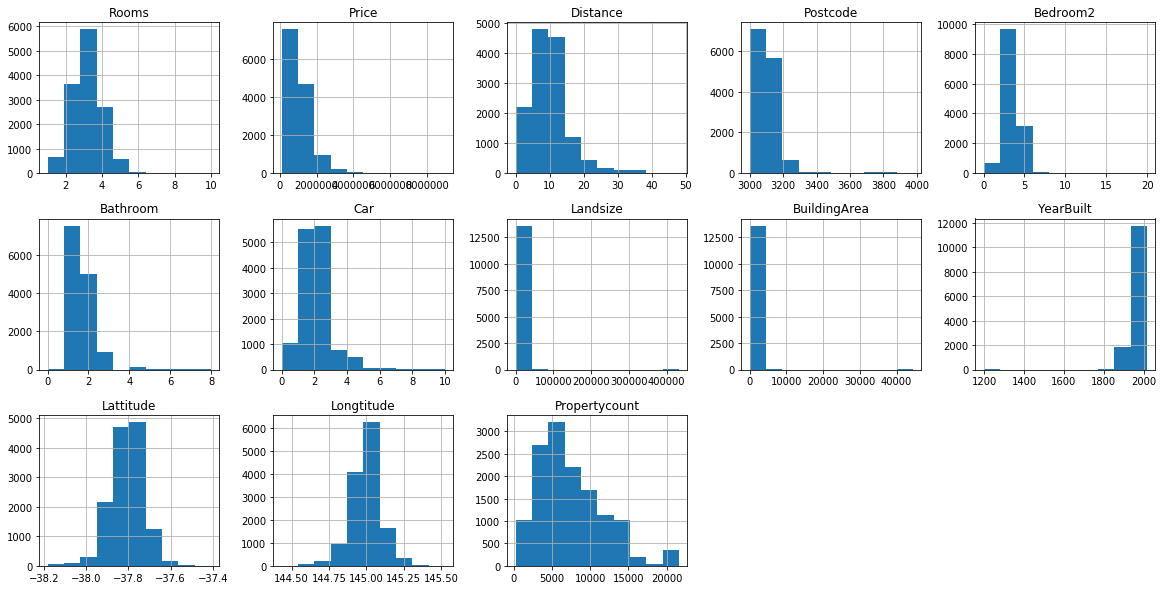

In [13]:
#Plotting a histogram of the data

data_regression.hist(layout=(3,5),figsize=(20,10))

#Showing the histogram using plt.show()

plt.show()

Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

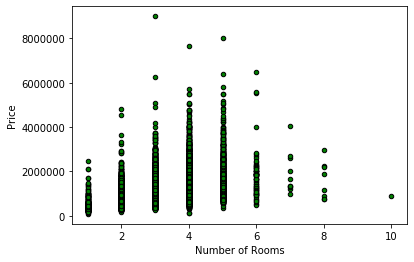

In [14]:
# Scatter plot to find the relationship between rooms and Price of the property 

plt.figure(figsize=(10,5))
data_regression.plot.scatter(x='Rooms',
                      y='Price',
                      c='Green',edgecolors= "black")
plt.xlabel('Number of Rooms')
plt.ylabel('Price')

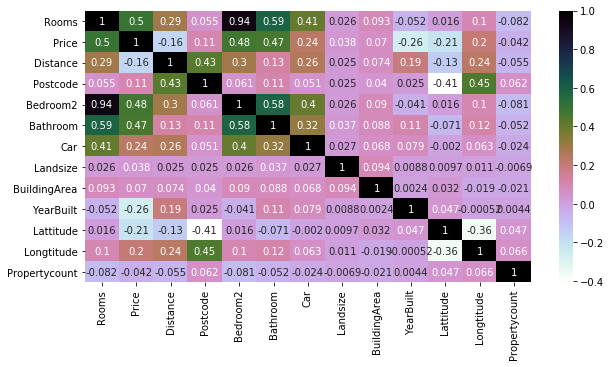

In [15]:
#Showing correlation using Heatmap

plt.figure(figsize=(10,5))
sns.heatmap(data_regression.corr(),annot=True,cmap='cubehelix_r')
plt.show()


### Analyzing Plots of Regression data

There are 13850 instances and 21 features. As a part of preprocessing, identified that missing values in the data. They are removed by replacing it with median. Landsize and BuildingArea are highly skewed features in the data. YearBuilt , Lattitude, Longitude are negatively skewed variables as their skewness is less than zero. Rest of the features are positively skewed.Most of the properties are in the South Eastern Metropolitan Region.We have almost more than 8000 properties of type 'h' and less than 1500 properties of type 't'.We don't have uniformity in data for Type feature.There are outliers in the data and skewness is also observed in the data using Histogram which shows whether the features are normal distributed or not. The attributes Property count, latitute and longitude are close to normal distribution and others are not normally distributed, negatively or positively skewed. Price of the property is distributed according to the rooms, property with 3 rooms have the highest price.Correlation is done to find the relationship between the features and vizualized it using the heat meap, found that bedrooms2 and rooms have highest correlation of 0.94 which is expected.

## Summary of Classification data

In [16]:
# Summary of the data
print(data_classification.shape)

#Structure of the data
data_classification.info()

# Description of the data
data_classification.describe()

#Checking missing values in the data
data_classification.isna().sum()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
#Identifying the numerical variables.

data_classification.select_dtypes(include=[np.number]).columns


Index([], dtype='object')

In [18]:
#Identifying categorical values 

data_classification.select_dtypes(exclude=np.number).columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## 	Plots for understanding or analysis of Classification data

[Text(0, 0, 'Poisonous'), Text(0, 0, 'Edible')]

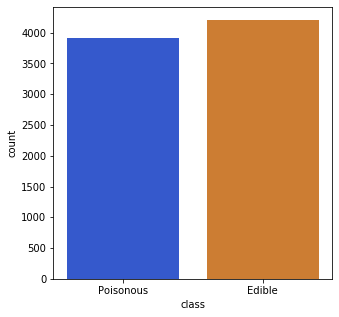

In [19]:
# Checking if the data is balanced on class

class_dict = ('Poisonous', 'Edible')
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot('class', hue=None, palette='bright', saturation=0.6, data=data_classification, dodge=True, ax=ax)
ax.set_xticklabels(class_dict)


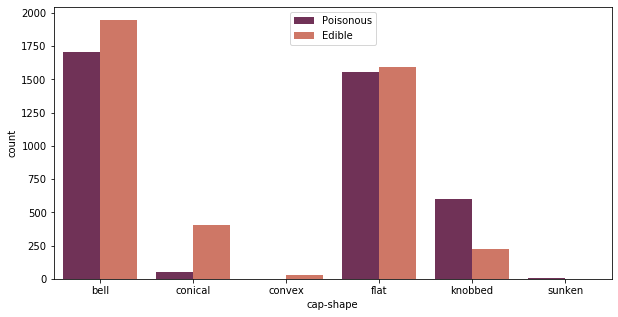

In [20]:
# Count plot on cap shape of the mushroom 

shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('cap-shape', hue='class', palette='rocket', saturation=0.6, data=data_classification, dodge=True, ax=ax)
ax.set_xticklabels(shape_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


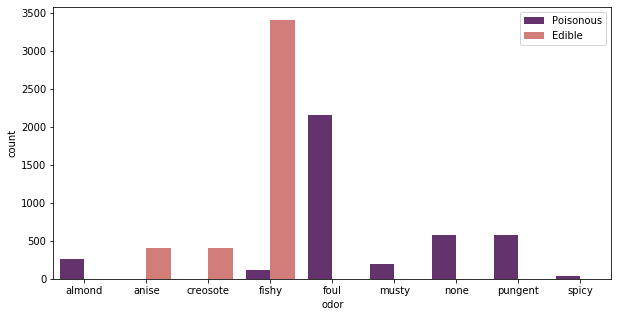

In [21]:
 # Count plot on odor of the mushroom 
    
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y","foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('odor', hue='class', palette='magma', saturation=0.6, data=data_classification, dodge=True, ax=ax)
ax.set_xticklabels(odor_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


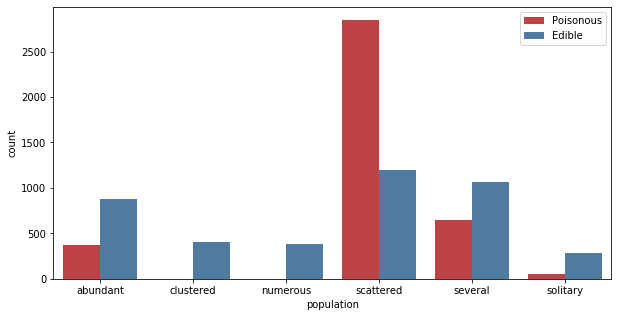

In [22]:
# Count plot on population 

population_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('population', hue='class', palette='Set1', saturation=0.6, data=data_classification, dodge=True, ax=ax)
ax.set_xticklabels(population_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


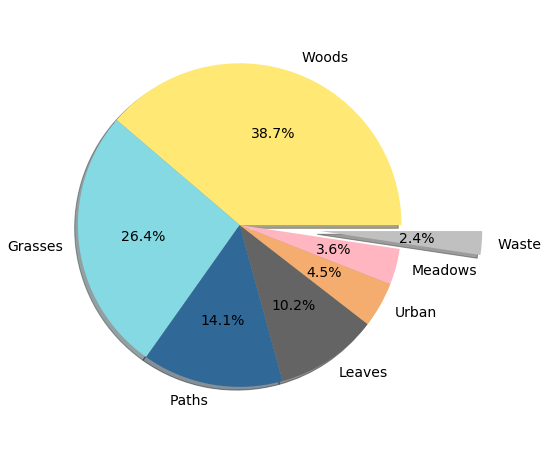

In [23]:
#To display habitat types and its values for a Single Pie chart

habitats = data_classification['habitat'].value_counts()
habitat_size = habitats.values.tolist() #to provide numerical values
habitat_types = habitats.axes[0].tolist() #To convert index labels object to list

# Preparing data

habitat_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#FFE873','#84D9E2','#306998','#646464','#F5AD6F','#FFB6C1','#C0C0C0']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(8,8))

# Pie chart

size, texts, autotexts = plt.pie(habitat_size, explode=explode, labels=habitat_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

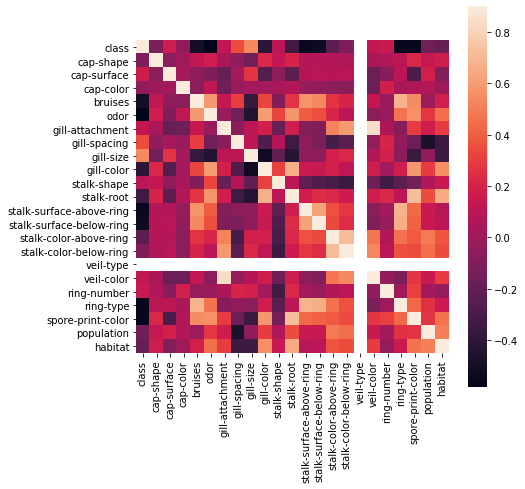

In [24]:
# Finding the correlation of the data using heat map
corr = data_classification.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap = "rocket", vmax=0.9, square=True)

In [25]:
# Changing categorical variables into ordinal

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data_encoded=data_classification.copy()
for column in data_classification.columns:
    data_encoded[column] = labelencoder.fit_transform(data_encoded[column])
    

In [26]:
correlation = data_encoded.corr()

In [27]:
correlation['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

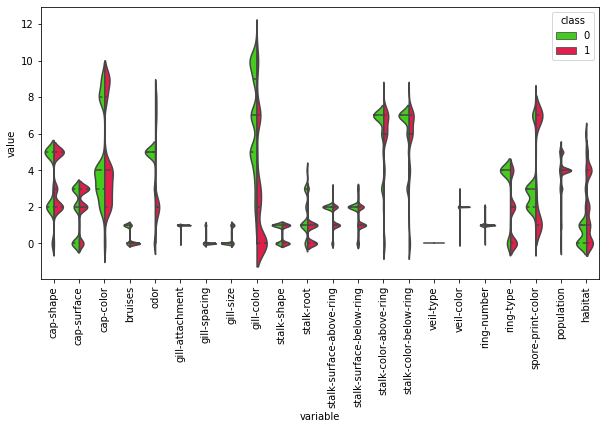

In [28]:
# To find the distribution of the data using violin plot

data_transpose = pd.melt(data_encoded, "class",var_name="variable")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="variable", y="value", hue="class", split = True, data=data_transpose, inner = 'quartile', palette = 'prism')
data_no_class = data_classification.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));


### Analyzing Plots of Regression data

There are 8124 instances and 23 features. There is not much preprocessing done as there are no missing values in the data. Plotted count plot for class variable and found that the data is balanced. Most of the mushrooms have a cap shape of bell shaped and flat. Mushrooms of fishy order are mostly edible. Most of the mushrooms with foul order are poisonous. Population of scattered mushrooms are poisonous. Most of the mushrooms are present in woods habitat. Correlation is found using heatmap and found many features which are highly correlated.Violin plot shows the distribution and probability distribution of the class over the other features of the dataset, cap-color seems to be balanced on the class.

There are no null values in our dataset. And no issues from the part of categorical attributes because the dataset is encoded and available in data_encoder. Normalization of the data will be handled during the implementation of each algorithm. So, there is no preprocessing done before the application of the algorithms.

# Methods

## Summary of Cross Validation and Correctness of Implementation

Cross validation is one of the most important technique used for the machine learning models to check the how well the model genralizes the new data. In simple words,it helps to make good predictions on the data that model has never seen. Basically, the aim of cross validation is to limit the problems of Underfitting (High Bias) and Overfitting (High variance).

Generally, we just split our data samples into two parts only that is training and test sets. But in cross validation we split our data into three sets,i.e, training, validation and test sets. We train our model on training data and check the accuracy on validation set. The basic intuition behind this is that we divide our data into certain number of folds(K) or groups and we iterate for that number of folds. For each fold, we divide data into training(on which we train our model) and validation set(to test our model) and finally calculates the accuracy in each fold. This is because we want to provide enough data for training as well as for validation to avoid the problem of underfitting(due to less data). This way, each set gets validated once and get trained k-1 times. Generally, we take value of 'k' between 5-10.

### Implementation

#### Partitioning the data into test and train

In [29]:
# Partitioning the data into train(90%) and test(10%)

from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .1)

In [30]:
def crossValidation(folds, X):
    '''
This method is performing Cross Validation on Complete Dataset.
folds: Number of folds we want to try for CV
X: Complete dataset.

This method will split the complete dataset into test and train data. Make different combinations of hyperparameter
 with hidden units. Finally Calculate Best parameters including hidden units and RMSE value for each fold and at last calculate RMSE value on test set.
    '''
     
    XTrain, XTest, TTrain, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     \n*********************Started the fold  ",i+1," *************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], TTrain[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, TTrain_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(TTrain, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], TTrain_rem[low:high, :]
            XTrain_cv, TTrain_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(TTrain_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iteratinng over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNet([XTrain.shape[1], hiddenUnits[units], TTrain.shape[1]])
                    nn_cv.train(XTrain_cv, TTrain_cv, **grid[k])
                    ypred_cv = nn_cv.use(X_validate)
                    arr_cv.append(np.sqrt(np.mean((T_validate - ypred_cv)**2)))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        #print("********Validation Errors from ",i+1," fold********* \n")
        #print(arr_cv)
        minimum = arr_cv.index(min(arr_cv)) # Getting the index of minimum errors from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best Hyperparameters: ", grid[min_index])
        print(" Best number of hidden units: ", best_hunit)
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNet([XTrain.shape[1], best_hunit, TTrain.shape[1]])
        nn_cv.train(XTrain_rem, TTrain_rem, **grid[min_index])
        ypred_test = nn_cv.use(X_test)
        arr_test.append(np.sqrt(np.mean((T_test - ypred_test)**2))) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" RMSE value for this test set: ",np.sqrt(np.mean((T_test - ypred_test)**2)))
            
    #print("**************Test Errors from all the fold***************\n")
    #print(arr_test)
    #minimum_test = arr_test.index(min(arr_test))
    index= arr_test.index(min(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("            \nFinal Hyperparameters are: ",final_param)
    final_units = bestUnits[index]
    print("              Final hidden units are: ",final_units)
    
    nn_cv = NeuralNet([XTrain.shape[1], final_units, TTrain.shape[1]])
    nn_cv.train(XTrain, TTrain, **final_param)
    ypred = nn_cv.use(XTest)
    
    print("              Final RMSE after 5-fold cross validation: ",np.sqrt(np.mean((TTest - ypred)**2)))
    return TTest, ypred

### Summary of Non Linear regression

Non-Linear regression is when the relationship among our data is not linear or straight line even if our variables are correlated. We need to choose our model based on how our data actually looks like. Just like we represent our linear model with single layer neural network, we define two layers(1 hidden layer and 1 output layer) neural network to deal with nonlinear data.

Intuition behind is that our original data is passed to the first layer of our neural network. The output generated by that layer after calculating new values (by similar procedure) of all the attributes is further passed onto the output layer and finally our output is genearted.

Linear Model: Predicted value is given by:$$ Y= W^T.X  $$

When we map our input data(X) with non linear function($\phi$), predicted values given by:$$ Y=\phi^T.W $$$$
\\ 
Z = h(X.V)
\\ 
Y = Z.W
$$Here,

Z = Output from the first(hidden) layer
h = activation function
V = Weights of the hidden layer
W = Weights of the final/Output layer

**Gradient Descent**

For gradient descent method we derive gradient to update the weights for each layer.$$
V \leftarrow V - \alpha_h \frac{\partial E}{\partial V}
\\
W \leftarrow W - \alpha_o \frac{\partial E}{\partial W}
$$

Further we calculate the gradient (partial derivatives of Error w.r.t Weight) for each layer and final weights would be:$$
V \leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} X^T \Big(T-Y) W^T . (1-Z^2)\Big)
\\
W \leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Z^T(T-Y)
$$

### Explanation of code

For the implementation of Non-Linear Regression, we are importing another class which is NeuralNet from nn.py which contains all the methods.

**NeuralNet Implementation:** Starting with the constructor of the class.

**1.init:** When we create the object of this class, we are passing parameters, which is the list containing three values that is 'number of attribuutes in our dataset', 'number of hidden units', 'number of outputs'. Apart from units, we are initailizing other class members also:
•	nLayers: Define number of layers in our neural network(2 in our case).
•	rho: Learning Rate.
•	_W: weights of all the layers
•	stdX: Object of Standardize class of our input
•	stdT: Object of Standardize class of our target

**2.add_ones:** Add ones column to our weight which is called adding bias term to our weights.

**3.set_hunit:** This function is used to update the weights.

**4.forward:** This function is basically calculating the outputs of each layer and returning 'Z'(set of all the outputs) and 't'(output from the last layer).

**5.backward:** In this function, through back propagation, we are updatinng the weights of each layer by deriving the gradient through error function as we have discussed previously.

**6._objectf:** This function is calculating error function.

**7.train:** This method is accepting our input data, target data and number of other parameters(hyperparameters) which we can tune to improve our model accuracy and finally calculating the best weights.

**8.use:** This is the method which is finally returning our predicted values. This method is calling forward method which is calculating the output of each layer from the best weights we got while training our model.

### Non-Linear Regression on Regression Dataset

In [31]:
correlation_regression=data_regression.corr()
correlation_regression['Price'].sort_values(ascending = False)

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.239109
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.069763
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.259387
Name: Price, dtype: float64

In [32]:
X=data_regression[['Rooms','Bedroom2','Bathroom','Car','Longtitude','Postcode','BuildingArea','Landsize','Propertycount','YearBuilt','Distance','Lattitude']]
T=data_regression[['Price']]
print("Shape of X{} and T{}".format(X.shape, T.shape))
df_regression_new = pd.concat([X, T], axis= 1)
print("Shape of new dataframe", df_regression_new.shape)

Shape of X(13580, 12) and T(13580, 1)
Shape of new dataframe (13580, 13)


In th above code, considered highly correlated features for the independent variables and price as the dependent variable

In [33]:
X_train, X_test, T_train, T_test = split(X.values, T.values)
print("Shape of X_train {}, X_test {}, T_train {}, T_test{}".format(X_train.shape, X_test.shape, T_train.shape, T_test.shape))

Shape of X_train (12222, 12), X_test (1358, 12), T_train (12222, 1), T_test(1358, 1)


In [34]:
nn = NeuralNet([X_train.shape[1], 3, T_train.shape[1]]) 
nn.train(X_train, T_train)
t_pred = nn.use(X_test)
print(np.sqrt(np.mean((T_test - t_pred)**2)))

364880.1771488667


### Non-Linear regression results from 5-fold cross validation

In [35]:
testSet, tPred = crossValidation(5, df_regression_new.values)

     
*********************Started the fold   1  *************************
      
 Best Hyperparameters:  {'_lambda': 1, 'optim': 'scg'}
 Best number of hidden units:  15
 RMSE value for this test set:  318904.16208445525
     
*********************Started the fold   2  *************************
      
 Best Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'}
 Best number of hidden units:  15
 RMSE value for this test set:  308787.4827804229
     
*********************Started the fold   3  *************************
      
 Best Hyperparameters:  {'_lambda': 1, 'optim': 'scg'}
 Best number of hidden units:  20
 RMSE value for this test set:  295732.01681490295
     
*********************Started the fold   4  *************************
      
 Best Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  20
 RMSE value for this test set:  303767.127086466
     
*********************Started the fold   5  *************************
      
 Best Hyperparameters:  {'

### Summary of NonLinear logistic Regression

In Linear logistic regression after calculating best possible weights of all the attributes, we calculate the predictions and uses softmax function to calculate the probabilities for all the classes. And the error function is given by negative log likelihood.$$
E(w) = - \sum_{n=1}^N \sum_{k=1}^K t \ln y
$$

Just like the Non-linear regreesion, we extend our neural network to two layers for Non-linear logistic regression. And in the similar way we derive the gradient to calculate the weights of hidden and output layer, difference would be the change in error function(log likelihood in this case).$$
V \leftarrow V - \alpha_h \frac{\partial E}{\partial V}
\\
W \leftarrow W - \alpha_o \frac{\partial E}{\partial W}
$$

After calculating partial derivative of error function with respect to both the weights we get:$$
Vm \leftarrow V + \alpha_h  X^T \Big((T- g(X)) W^T . (1-Z^2)\Big)
\\
W \leftarrow W + \alpha_o  Z^T(T- g(X))
$$

g-- Softmax function

### Explanation of codes

For the coding perspective, the implementation of Non-linear logistic regression is pretty much similar to that of Non-Linear Regression. The difference between the two implementations is discussed below:

We made a new class NeuralNetLogReg which is in inheriting NeuralNet as a base class which we have discussed before. All of methods we have used from NeuralNet except one method and made some changes in some methods.

**1.softmax:** This is the new method we have implemented in this class, which will return the probability of our predicted values.

**2.forward:** The implementation of this method is similar to the previous one, we have just added another line of code which is calculating softmax of target value which the earlier forward(NeuralNet) method was returning and finally returned the updated target.

**3._objectf:** This method is completely changed because cost function of Regression(RMSE) and classification is different. In this case our objective function is negative log likelihood.

**4.train:** It is the same as that of earlier one, just that we have passed our target values after encoding because we want probabilities of each class.

**5.use:** Implementation of this method is also the same. We are returning two things from this function that is class predicted of our target function and the probabilities of each class.

In [36]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        super().__init__(nunits)
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t, Z = super().forward(X)
        return self.softmax(t), Z
    

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(np.sum(T * np.log(Y), axis= 1), axis= 0)) + wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
        Ttrain = onehot_encoder.fit_transform(T)
        return super().train(X, Ttrain, **params)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        G, Z = self.forward(Xs)
        classes = np.argmax(G, axis = 1)
        #prob = np.amax(G, axis = 1 )
        return classes, G

### Examination of Toy Data

Text(0.5, 1.0, 'test data set')

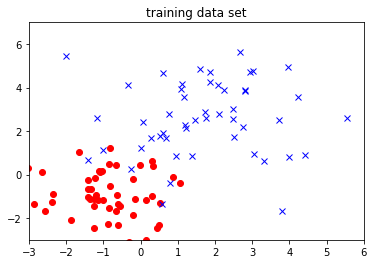

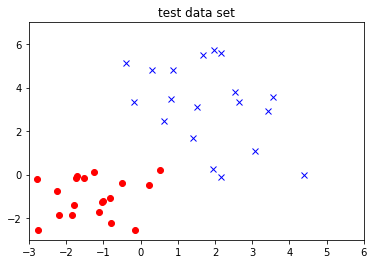

In [37]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [38]:
logistic = NeuralNetLogReg([2, 4, 2])

logistic.train(Xtrain, Ttrain)
classes, Y = logistic.use(Xtest)
print(Xtest.shape)

(40, 2)


Accuracy:  50.0 %


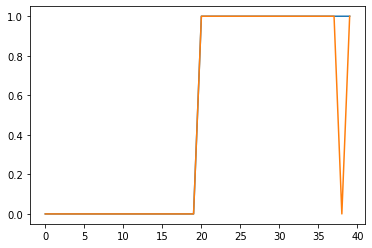

In [39]:
plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - classes)) * 100, "%")

### Non-Linear Logistic Regression on Classification dataset

In [40]:
data_binary = data_encoded.copy()
X_log= data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color'], axis=1)
T_log=pd.DataFrame(data_binary['class'])
df_classification_new = pd.concat([X_log, T_log], axis= 1)
print("Shape of new dataframe", df_classification_new.shape)

Shape of new dataframe (8124, 15)


In [41]:
X_train_log, X_test_log, T_train_log, T_test_log = split(X_log.values, T_log.values)
print("Shape of X_train_log {}, X_test_log {}, T_train_log {}, T_test_log{}".format(X_train_log.shape, X_test_log.shape, T_train_log.shape, T_test_log.shape))

Shape of X_train_log (7311, 14), X_test_log (813, 14), T_train_log (7311, 1), T_test_log(813, 1)


In [42]:
number_classes = len(np.unique(T_train_log))
print(number_classes)

2


In [43]:
logistic_data = NeuralNetLogReg([X_train_log.shape[1], 2, number_classes])

logistic_data.train(X_train_log, T_train_log)
classes_data, prob = logistic_data.use(X_test_log)


In [44]:
print("Accuracy: ", 100 - np.mean(np.abs(T_test_log - classes_data)) * 100, "%")
confusion_matrix(T_test_log, classes_data)

Accuracy:  49.99251099522065 %


array([[393,  18],
       [  8, 394]])

### Cross validation for Logistic Regression

In [45]:
def crossValidation_logistic(folds, X):
    XTrain, XTest, Train, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    number_classes = len(np.unique(Train))
    
    param_grid = [{'optim': ['scg'], '_lambda': [.001,.01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("\n     *********************Started the fold ",i+1,"*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], Train[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, Train_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(Train, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], Train_rem[low:high, :]
            XTrain_cv, Train_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(Train_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iterating over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetLogReg([XTrain.shape[1], hiddenUnits[units], number_classes])
                    nn_cv.train(XTrain_cv, Train_cv, **grid[k])
                    ypred_cv, G = nn_cv.use(X_validate)
                    arr_cv.append(np.mean(np.abs(T_validate - ypred_cv) * 100))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        minimum = arr_cv.index(max(arr_cv)) # Getting the index of maximum accuracy from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best set of Hyperparameters: ", grid[min_index])
        print(" Best number of hidden units: ", best_hunit)
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNetLogReg([XTrain.shape[1], best_hunit, number_classes])
        nn_cv.train(XTrain_rem, Train_rem, **grid[min_index])
        ypred_test, G = nn_cv.use(X_test)
        arr_test.append(100 - np.mean(np.abs(T_test - ypred_test) * 100)) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" Test Accuracy for Test set: ",100 - np.mean(np.abs(T_test - ypred_test) * 100))
            
    index= arr_test.index(max(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("\n    Final Hyperparameters are:",final_param)
    final_units = bestUnits[index]
    print("      Final hidden units are:",final_units)
    
    nn_cv = NeuralNetLogReg([XTrain.shape[1], final_units, number_classes])
    nn_cv.train(XTrain, Train, **final_param)
    ypred, G = nn_cv.use(XTest)
    
    print("      Final Accuracy after 5-fold cross validation: ",100 - np.mean(np.abs(TTest - ypred) * 100))
    return TTest, ypred, G

In [46]:
test, Tpredicted, G = crossValidation_logistic(5, df_classification_new.values)


     *********************Started the fold  1 *************************
      
 Best set of Hyperparameters:  {'_lambda': 1, 'optim': 'scg'}
 Best number of hidden units:  14
 Test Accuracy for Test set:  49.872370925273366

     *********************Started the fold  2 *************************
      
 Best set of Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'}
 Best number of hidden units:  15
 Test Accuracy for Test set:  50.20042630356632

     *********************Started the fold  3 *************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  15
 Test Accuracy for Test set:  50.19649637604541

     *********************Started the fold  4 *************************
      
 Best set of Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'}
 Best number of hidden units:  14
 Test Accuracy for Test set:  50.005052763955455

     *********************Started the fold  5 *************************
      
 Best set of

## Results

### Presentation of CV results

#### Cross Validation Results Comparision for Non-Linear Regression


<table style="width:100%">
    <h4 align='center'>Results for Each Validation</h4>
  <tr>
    <th>Fold</th>
    <th>Best Hyperparameters</th>
    <th>Best Number of Hidden Units</th> 
    <th>RMSE Value</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>{'_lambda': 0.01, 'optim': 'scg'}</td> 
    <td>15</td>
    <td>318904.16208445525</td>
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>15</td>
    <td>308787.4827804229</td> 
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>20</td>
    <td>295732.01681490295</td>
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>{'_lambda': 0.01, 'optim': 'scg'}</td> 
    <td>20</td>
    <td>303767.127086466</td> 
  </tr>
   <tr>
    <td>Fold 5</td>
     <td>{'_lambda': 0.1, 'optim': 'scg'}</td> 
    <td>10</td>
    <td>324189.2771726182</td>
  </tr>
</table>

<table>
    <h4 align ='center'>Final Results After 5 fold Validation</h4>
    <tr>
        <th>Final Hyperparameters</th>
        <th>Final umber of Hidden Units</th> 
        <th>RMSE Value for original test set</th>
    </tr>
    <tr>
        <th>{'_lambda': 1, 'optim': 'scg'}</th>
        <th>20</th>
        <th>300667.7711411011</th>
    </tr>

#### Cross Validation Results Comparision for Non-Linear Logistic Regression


<table style="width:100%">
    <h4 align='center'>Results for Each Validation</h4>
  <tr>
    <th>Fold</th>
    <th>Best Hyperparameters</th>
    <th>Best Number of Hidden Units</th> 
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Fold 1</td>
    <td>{'_lambda': 0.01, 'optim': 'scg'}</td> 
    <td>14</td>
    <td>49.872370925273366</td>
  </tr>
   <tr>
    <td>Fold 2</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>15</td>
    <td>50.20042630356632</td> 
  </tr>
   <tr>
    <td>Fold 3</td>
    <td>{'_lambda': 0.001, 'optim': 'scg'}</td> 
    <td>15</td>
    <td>50.19649637604541</td>
  </tr>
    <tr>
    <td>Fold 4</td>
    <td>{'_lambda': 0.01, 'optim': 'scg'}</td> 
    <td>14</td>
    <td>50.005052763955455</td> 
  </tr>
   <tr>
    <td>Fold 5</td>
    <td>{'_lambda': 0.1, 'optim': 'scg'}</td> 
    <td>10</td>
    <td>50.10994440088255</td>
  </tr>
</table>

<table>
    <h4 align ='center'>Final Results After 5 fold Validation</h4>
    <tr>
        <th>Final Hyperparameters</th>
        <th>Final umber of Hidden Units</th> 
        <th>Accuracy for original test set</th>
    </tr>
    <tr>
        <th>{'_lambda': 1, 'optim': 'scg'}</th>
        <th>15</th>
        <th>50.10325749013948</th>
    </tr>

### Discussion about parameter choice

Selection of the parameters are the most important part for getting best results from the model. Starting with the initialization of our class object, we pass a list containing 3 items:
1. Number of inputs.
2. Number of hidden units.
3. Number of outputs/classes.

Out of these 3, we can tune only with number of units. So in our **crossValidation** function, we defned a list containing different number of hidden units on which we tuned our model.

Apart from this, we can play around with number of other parameters if we want, when we call our train method. Those parameters are also called hypeparameters. They have been initailized with some value by default in train method but to increase the accuracy we can tune them. 

In the Cross Validation method, we have defined a list of dictionary (param_grid) consisting of **name of parameter(key)** and **number of values** we want to try for that particular parameter with other combinations. Finally we generated a list of all parameter combinations we want to train the model with. 

Due to computational time complexity, we kept our number of parameters just two(optim and _lambda) but we can try other combinations as well. The model will run with all the set of parametrs for first validation sets and pick a best from that and runs that parameter combination for the test set in each fold. This process is repeated for each number of fold (we have considered the case of 5 folds). Finally it picks best from set of parameters from the test sets out all test sets obtained during each fold. For that set of parameters we run our **final test set** (which was never introduced to the model).

## Plots

#### Plots for Non-linear regression

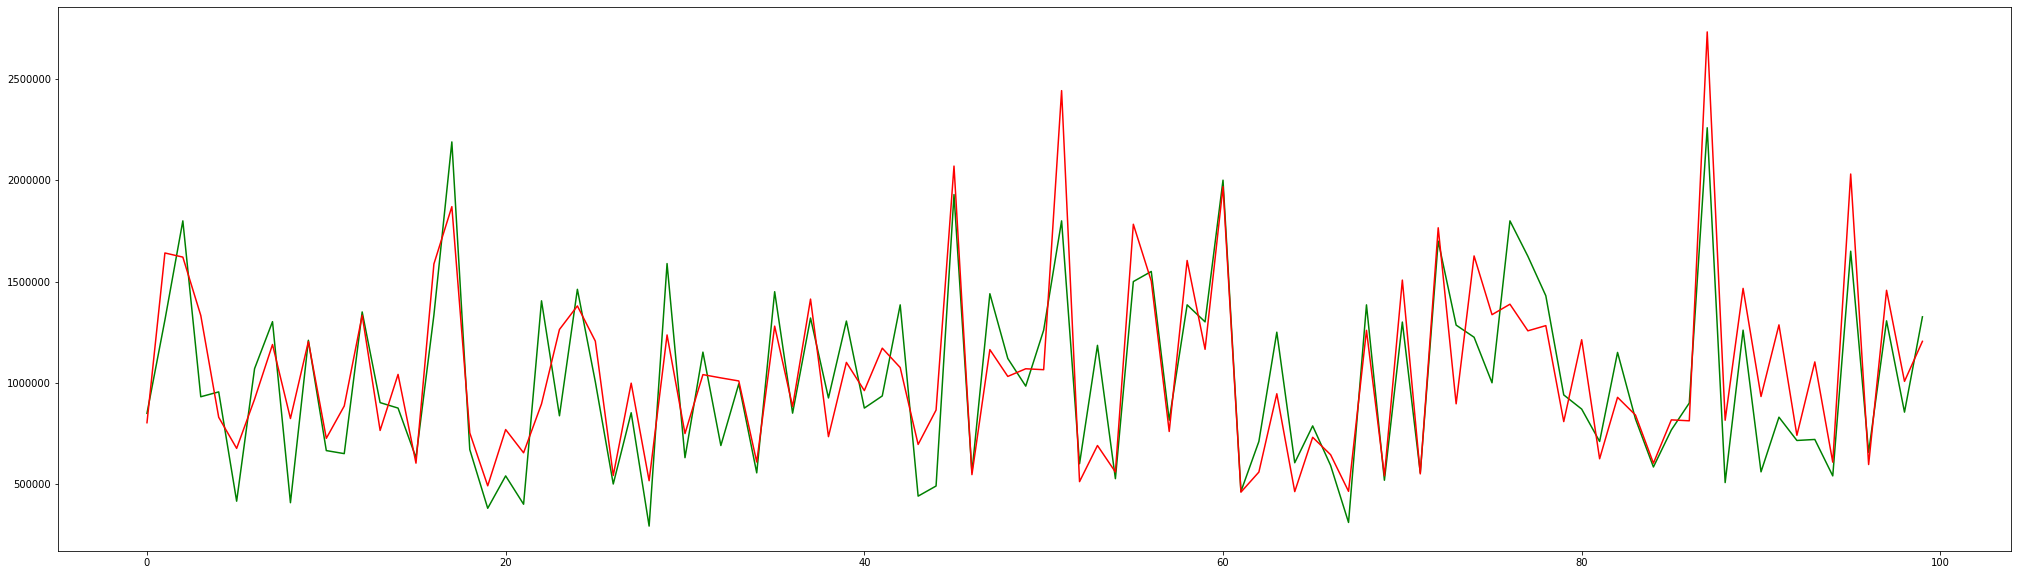

In [47]:
# This plot refers to the Non-linear regression without cross validation.
plt.figure(figsize=(35,10))
plt.plot(T_test[:100],'g')
plt.plot(t_pred[:100],'r')

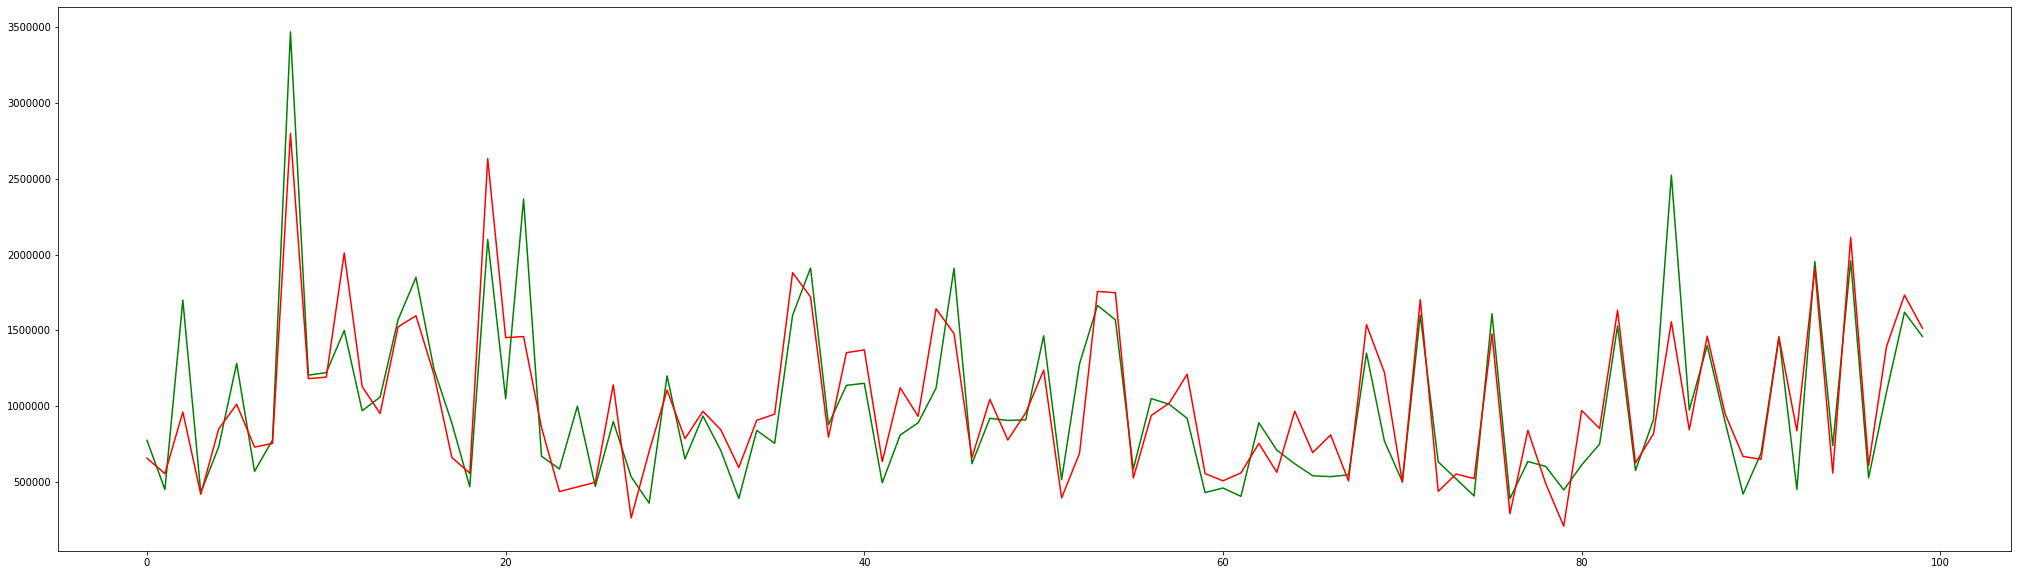

In [48]:
# This plot refers to the Non-linear regression run completely on cross validation. 
plt.figure(figsize=(35,10))
plt.plot(testSet[:100],'g')
plt.plot(tPred[:100],'r')

#### Plots for Non-linear Logistic Regression

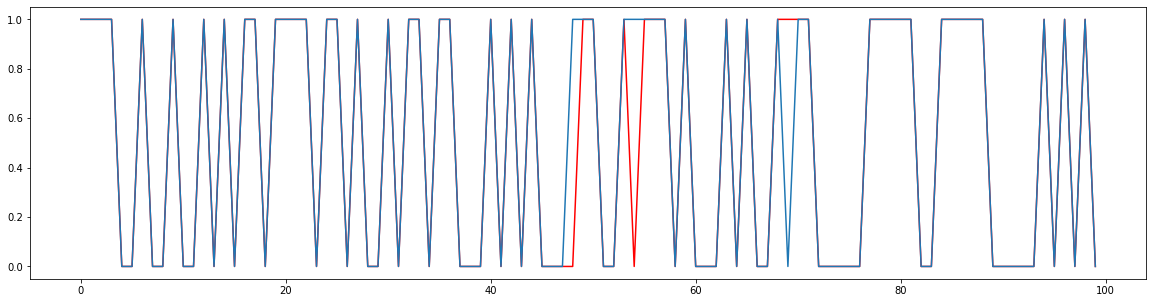

In [49]:
# This plot refers to the Non-linear logistic regression ran without cross validation.
plt.figure(figsize=(20,5))
plt.plot(T_test_log[:100],'r')
plt.plot(classes_data[:100])

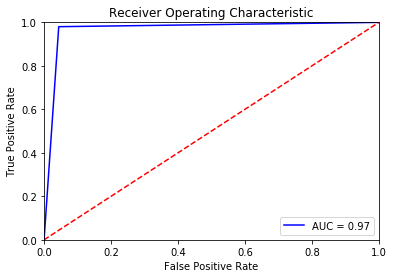

In [50]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(T_test_log, classes_data)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logistic, tpr_logistic, 'b', label = 'AUC = %0.2f' % roc_auc_logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

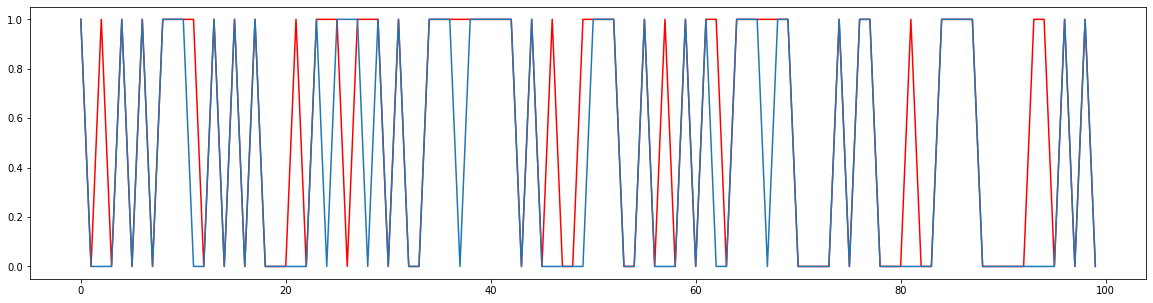

In [51]:
# This plot refers to the Non-linear logistic regression ran with cross validation.

plt.figure(figsize=(20,5))
plt.plot(test[:100],'r')
plt.plot(Tpredicted[:100])

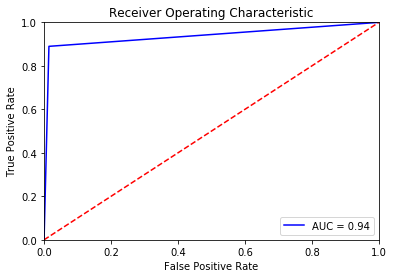

In [52]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(test, Tpredicted)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logistic, tpr_logistic, 'b', label = 'AUC = %0.2f' % roc_auc_logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Discussion About prediction Results

We have seen the results for both the algorithms by running algorithm directly without cross validation and with cross validation and hyperparameter tuning. As far as Non-Linear regression is concerned, there is differentiable improvement in results through cross validation and parameter tuning  as compared to directly applying on whole dataset. We have plotted the graph between actual test results and predicted value when we run the algorithm on complete dataset. But the graph plotted is just for the 100 rows, to have better visualization of comparison.

During 5-fold cross validation, we try to tune our model on different set of hyperparameter like 'optim', '_lambda' and'number of hidden units'. We tried for less combinations of hyperparameters due to the computational complexity. But if we try for more values of hyperparameters or for more parameters, we could obtain more better results. 

Almost similar is the scenario for non-linear logistic regression. We can visulize the results from the above plots which is plotted between predicted classes and the target variable. Similar to non-linear regreesion plot, we have taken 100 rows to visualize the results better and from ROC curve we can see that accuracy we achieved is 94% which is quite good. In our case we got accuracy around 50% for all the folds as well as in the final outcome, which is slightly increased in comparision to without cross validation results. That may be due to our dataset or this accuracy could increase if we increase our hyperparameter number and their try out more values in them. Due to computational time complexity, we kept less number of hyperparameters.

When we passed our data into the first layer of our Non-Linear model, each attribute passed onto the each unit and perform calculations with the initialized weights of each unit and finally a output is generated from each unit of that layer and further we apply the activation function onto that output (which makes our model non-linear). Further that output becomes input for the next layer and similar process followed in each layer. This is called **Forward Process**.

Meanwhile, we keep track of the outputs from each layer, because that will help us in **Back Propagation** in order to calculate the best possible weights. In this case we derive the **gradient** to calculate the best weights starting from the last layer with the help of **Chain rule** and finally that weights are used to predict our target.


# Conclusion

Number of important and new concepts we have learnt and implemented in our workbook.
1. **Cross Validation**: One of the most important and effective way to deal with the problem of overfitting and underfitting of  model. Basic idea we divide our data into test and train set(further divided into another train and test set (called validation set)). This way we train and test our data number of times and most importantly on each kind of data obtained the best result out of that. Finally test our model on totally new data that was never introduced to our model.

    In our implementation, we have trained our models on different set of hyperparameters to get the best results and plotted them to compare the test and predicted values.
 
 
2. **Neural Networks**: We have learnt through implementation that how 2 layered neural network works. We have implemented 2 major techniques of supervised learning (Regression and Classification) as part of our implementation:
    1. Non-Linear Regression.
    2. Non-Linear Logistic Regression.
    
Implemented our regression and classification dataset without and through cross validation. We have observed that after tuning with different hyperparameters using cross validation, we can get better results/accuracy. This can further be improved if we try on with different and more values of hyperparameters. We kept the numbers less due to computational time.

# References

Tony Pino, Domain.com.au,"Snapshot of Tony Pino's Melbourne Housing Dataset",  https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

G. H. Lincoff (Pres.), Alfred A. Knopf, Jeff Schlimmer (data donor), The Audubon Society Field Guide to North American Mushrooms (1981), https://www.kaggle.com/uciml/mushroom-classification

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

Bengfort, B., Bilbro, R., Danielsen, N., Gray, L., & others. (2018). Yellowbrick. doi:10.
5281/zenodo.1206239, https://www.scikit-yb.org/en/latest/about.html

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017

## Extra Analysis

### Trying with Different Activation Functions

There are three main activation functions that we will be discussing:
1. **Tanh function**: This function we have already used in our implementation.
2. **Sigmoid function**
3. **ReLu function**

### 2. Implementation of both algorithms through Sigmoid function

#### Non linear regression using sigmoid function

In [53]:
class NeuralNetSigmoid(NeuralNet):
    '''
        We are defining a new class for calculating results for non-linear regression using Sigmoid function.
        We are inheriting NeurelNet and make changes only in the forward function where it is using activation function.
    '''
    
    def _init_(self,nunits):
        NeuralNet._init_(self,nunits)
    
   
    def sigmoid(self,X):
        return 1 / ( 1 + np.exp(-X))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.sigmoid(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

In [54]:
nn_sig = NeuralNetSigmoid([X_train.shape[1], 3, T_train.shape[1]]) 
nn_sig.train(X_train, T_train)
t_pred_sig = nn_sig.use(X_test)
print(np.sqrt(np.mean((T_test - t_pred_sig)**2)))

472658.17934789247


In [55]:
# Cross validation for sigmoid non-linear regression
def crossValidation_Sigmoid(folds, X):
    XTrain, XTest, TTrain, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     *********************Started the ",i+1," fold*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], TTrain[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, TTrain_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(TTrain, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], TTrain_rem[low:high, :]
            XTrain_cv, TTrain_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(TTrain_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iteratinng over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetSigmoid([XTrain.shape[1], hiddenUnits[units], TTrain.shape[1]])
                    nn_cv.train(XTrain_cv, TTrain_cv, **grid[k])
                    ypred_cv = nn_cv.use(X_validate)
                    arr_cv.append(np.sqrt(np.mean((T_validate - ypred_cv)**2)))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        #print("********Validation Errors from ",i+1," fold********* \n")
        #print(arr_cv)
        minimum = arr_cv.index(min(arr_cv)) # Getting the index of minimum errors from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best Hyperparameters: ", grid[min_index])
        print(" Best number of hidden units: ", best_hunit)
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNetSigmoid([XTrain.shape[1], best_hunit, TTrain.shape[1]])
        nn_cv.train(XTrain_rem, TTrain_rem, **grid[min_index])
        ypred_test = nn_cv.use(X_test)
        arr_test.append(np.sqrt(np.mean((T_test - ypred_test)**2))) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" RMSE value for this test set: ",np.sqrt(np.mean((T_test - ypred_test)**2)))
            
    #print("**************Test Errors from all the fold***************\n")
    #print(arr_test)
    #minimum_test = arr_test.index(min(arr_test))
    index= arr_test.index(min(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("            \nFinal Hyperparameters are: ",final_param)
    final_units = bestUnits[index]
    print("              Final hidden units are: ",final_units)
    
    nn_cv = NeuralNetSigmoid([XTrain.shape[1], final_units, TTrain.shape[1]])
    nn_cv.train(XTrain, TTrain, **final_param)
    ypred = nn_cv.use(XTest)
    
    print("              Final RMSE after 5-fold cross validation: ",np.sqrt(np.mean((TTest - ypred)**2)))
    return TTest, ypred

In [56]:
# Cross validation
testSet_sig, tPred_sig = crossValidation_Sigmoid(5, df_regression_new.values)

     *********************Started the  1  fold*************************
      
 Best Hyperparameters:  {'_lambda': 1, 'optim': 'scg'}
 Best number of hidden units:  15
 RMSE value for this test set:  488168.32302504784
     *********************Started the  2  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.1, 'optim': 'scg'}
 Best number of hidden units:  12
 RMSE value for this test set:  437214.812621003
     *********************Started the  3  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  10
 RMSE value for this test set:  434210.3732239358
     *********************Started the  4  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  15
 RMSE value for this test set:  441758.8190378793
     *********************Started the  5  fold*************************
      
 Best Hyperparameters:  {'_lambda': 1, 

#### Plots

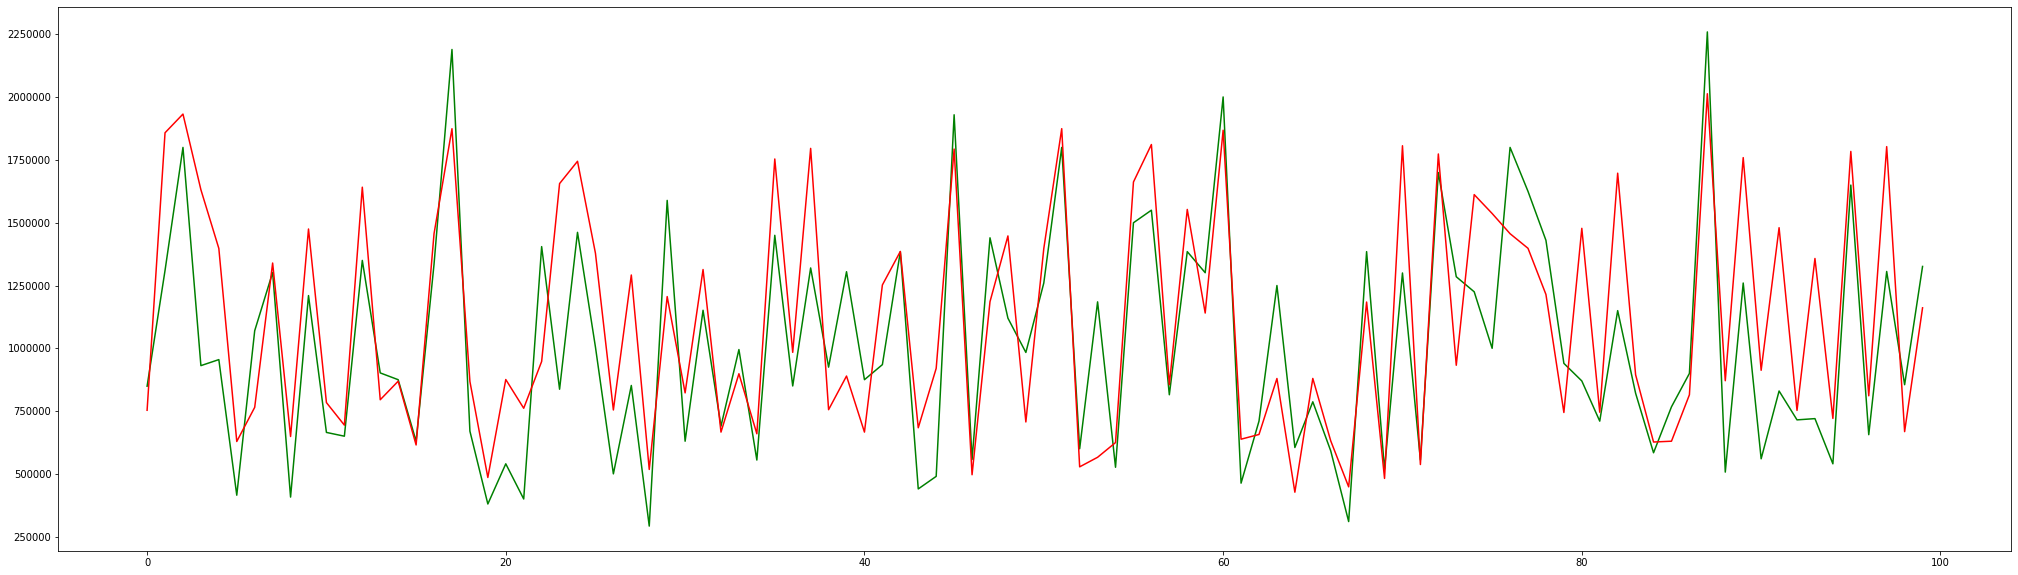

In [57]:
# This plot refers to the Non-linear logistic regression without cross validation.
plt.figure(figsize=(35,10))
plt.plot(T_test[:100],'g')
plt.plot(t_pred_sig[:100],'r')

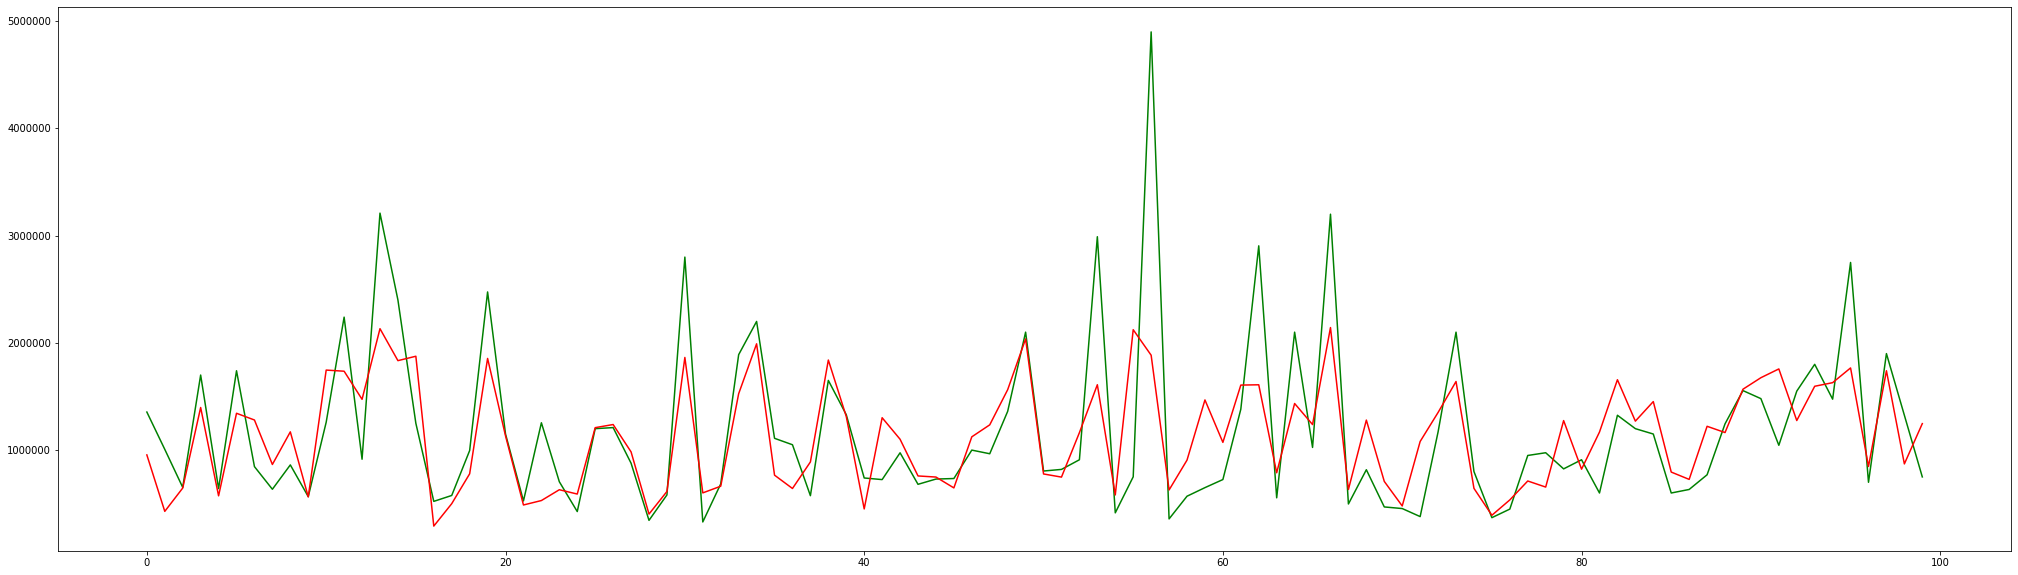

In [58]:
# This plot refers to the Non-linear regression with cross validation.
plt.figure(figsize=(35,10))
plt.plot(testSet_sig[:100],'g')
plt.plot(tPred_sig[:100],'r')

#### Non linear logistic regression using sigmoid function

In [59]:
from nn import NeuralNet

class NeuralNetLogRegSigmoid(NeuralNetLogReg):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        super().__init__(nunits)
 
    def sigmoid(self,X):
        return 1 / ( 1 + np.exp(-X))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.sigmoid(np.dot(self.add_ones(t), self._W[i]))
        return self.softmax(t), Z

In [169]:
X_log_sigmoid= data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color','spore-print-color','cap-surface','ring-number','gill-spacing','stalk-color-above-ring','population','habitat','ring-type'], axis=1)
#X_log_sigmoid=data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color' ], axis=1)
T_log_sigmoid=pd.DataFrame(data_binary['class'])
df_classification_s = pd.concat([X_log_sigmoid, T_log_sigmoid], axis= 1)
X_train_log_s, X_test_log_s, T_train_log_s, T_test_log_s = split(X_log_sigmoid.values, T_log_sigmoid.values)

In [171]:
logistic_data_sigmoid = NeuralNetLogRegSigmoid([X_train_log_s.shape[1], 6, number_classes])

logistic_data_sigmoid.train(X_train_log_s, T_train_log_s)
classes_data_sigmoid, prob_sigmoid = logistic_data_sigmoid.use(X_test_log_s)

In [172]:
print("Accuracy: ", 100 - np.mean(np.abs(T_test_log_s - classes_data_sigmoid)) * 100, "%")

Accuracy:  49.783272740476484 %


In [173]:
confusion_matrix(T_test_log_s, classes_data_sigmoid)

array([[116, 293],
       [  4, 400]])

In [175]:
#Cross validation for Non-linear logistic regression
def crossValidation_logistic_sigmoid(folds, X):
    XTrain, XTest, Train, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     *********************Started the ",i+1," fold*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], Train[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, Train_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(Train, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], Train_rem[low:high, :]
            XTrain_cv, Train_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(Train_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iterating over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetLogRegSigmoid([XTrain.shape[1], hiddenUnits[units], Train.shape[1]+1])
                    nn_cv.train(XTrain_cv, Train_cv, **grid[k])
                    ypred_cv, G = nn_cv.use(X_validate)
                    arr_cv.append(np.mean(np.abs(T_validate - ypred_cv) * 100))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        #print("********Validation Errors from ",i+1," fold********* \n")
        #print(arr_cv)
        minimum = arr_cv.index(max(arr_cv)) # Getting the index of minimum errors from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best set of Hyperparameters: ", grid[min_index],"\n")
        print(" Best number of hidden units: ", best_hunit,"\n")
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNetLogRegSigmoid([XTrain.shape[1], best_hunit, Train.shape[1]+1])
        nn_cv.train(XTrain_rem, Train_rem, **grid[min_index])
        ypred_test, G = nn_cv.use(X_test)
        arr_test.append(100 - np.mean(np.abs(T_test - ypred_test) * 100)) # Calculating test accuracy from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" Test Accuracy for Test set: ",np.mean(100 - np.abs(T_test - ypred_test) * 100) ,"\n")
            
    #print("**************Test Errors from all the fold***************\n")
    #print(arr_test)
    #minimum_test = arr_test.index(min(arr_test))
    index= arr_test.index(max(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("\n    Final Hyperparameters are:",final_param, "\n")
    final_units = bestUnits[index]
    print("      Final hidden units are:",final_units, "\n")
    
    nn_cv = NeuralNetLogRegSigmoid([XTrain.shape[1], final_units, Train.shape[1]+1])
    nn_cv.train(XTrain, Train, **final_param)
    ypred, G = nn_cv.use(XTest)
    
    print("      Final Accuracy after 5-fold cross validation: ",100 - np.mean(np.abs(TTest - ypred) * 100))
    return TTest, ypred, G

In [176]:
test_sigmoid, Tpredicted_sigmoid, G_sigmoid = crossValidation_logistic_sigmoid(5, df_classification_s.values)

     *********************Started the  1  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  15 

 Test Accuracy for Test set:  46.92202462380301 

     *********************Started the  2  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  10 

 Test Accuracy for Test set:  52.05198358413133 

     *********************Started the  3  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  5 

 Test Accuracy for Test set:  49.49753069554103 

     *********************Started the  4  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  15 

 Test Accuracy for Test set:  51.36798905608755 

     *********************Started the  5  fold***********************

### Plots

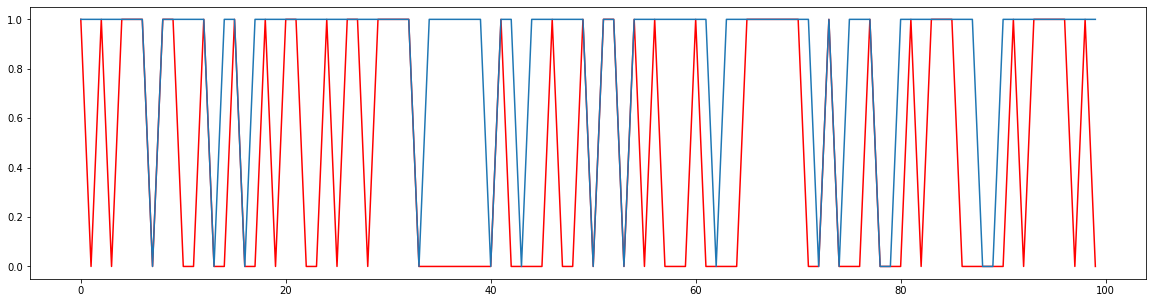

In [174]:
# Plotting first 100 points without cross validation.

plt.figure(figsize=(20,5))
plt.plot(T_test_log_s[:100],'r')
plt.plot(classes_data_sigmoid[:100])


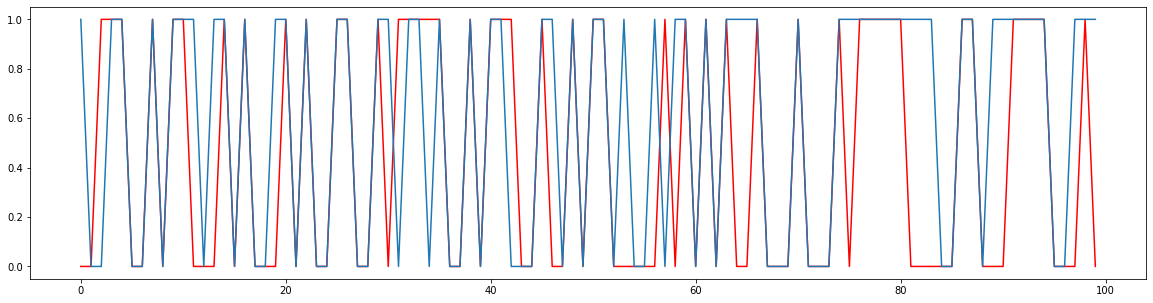

In [177]:
# Plotting first 100 points with cross validation.

plt.figure(figsize=(20,5))
plt.plot(test_sigmoid[:100],'r')
plt.plot(Tpredicted_sigmoid[:100])

### 3. Implementation of both algorithms through ReLu function

In [68]:
class NeuralNetReLu(NeuralNet):
    '''
        We are defining a new class for calculating results for non-linear regression using ReLu function.
        We are inheriting NeurelNet and make changes only in the forward function where it is using activation function.
    '''
    
    def _init_(self,nunits):
        NeuralNet._init_(self,nunits)
    
   
    def ReLU(self,x):
        return np.maximum(x,0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

In [69]:
nn_ReLu = NeuralNetReLu([X_train.shape[1], 3, T_train.shape[1]]) 
nn_ReLu.train(X_train, T_train)
t_pred_ReLu = nn_ReLu.use(X_test)
print(np.sqrt(np.mean((T_test - t_pred_ReLu)**2)))

678917.3371430541


In [70]:
# Cross validation for sigmoid non-linear regression
def crossValidation_ReLu(folds, X):
    XTrain, XTest, TTrain, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     *********************Started the ",i+1," fold*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], TTrain[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, TTrain_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(TTrain, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], TTrain_rem[low:high, :]
            XTrain_cv, TTrain_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(TTrain_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iteratinng over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetReLu([XTrain.shape[1], hiddenUnits[units], TTrain.shape[1]])
                    nn_cv.train(XTrain_cv, TTrain_cv, **grid[k])
                    ypred_cv = nn_cv.use(X_validate)
                    arr_cv.append(np.sqrt(np.mean((T_validate - ypred_cv)**2)))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])
                
        #print("********Validation Errors from ",i+1," fold********* \n")
        #print(arr_cv)
        minimum = arr_cv.index(min(arr_cv)) # Getting the index of minimum errors from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best Hyperparameters: ", grid[min_index])
        print(" Best number of hidden units: ", best_hunit)
        
        
        #for index in range(len(grid_index)): # Iterating over the indices of grid indexes to calculate test errors
        nn_cv = NeuralNetReLu([XTrain.shape[1], best_hunit, TTrain.shape[1]])
        nn_cv.train(XTrain_rem, TTrain_rem, **grid[min_index])
        ypred_test = nn_cv.use(X_test)
        arr_test.append(np.sqrt(np.mean((T_test - ypred_test)**2))) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" RMSE value for this test set: ",np.sqrt(np.mean((T_test - ypred_test)**2)))
            
    #print("**************Test Errors from all the fold***************\n")
    #print(arr_test)
    #minimum_test = arr_test.index(min(arr_test))
    index= arr_test.index(min(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("            \nFinal Hyperparameters are: ",final_param)
    final_units = bestUnits[index]
    print("              Final hidden units are: ",final_units)
    
    nn_cv = NeuralNetReLu([XTrain.shape[1], final_units, TTrain.shape[1]])
    nn_cv.train(XTrain, TTrain, **final_param)
    ypred = nn_cv.use(XTest)
    
    print("              Final RMSE after 5-fold cross validation: ",np.sqrt(np.mean((TTest - ypred)**2)))
    return TTest, ypred

In [71]:
# Cross validation
testSet_ReLu, tPred_ReLu = crossValidation_ReLu(5, df_regression_new.values)

     *********************Started the  1  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.1, 'optim': 'scg'}
 Best number of hidden units:  10
 RMSE value for this test set:  625131.9646992824
     *********************Started the  2  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'}
 Best number of hidden units:  12
 RMSE value for this test set:  557189.1250485277
     *********************Started the  3  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  12
 RMSE value for this test set:  532774.7981483608
     *********************Started the  4  fold*************************
      
 Best Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'}
 Best number of hidden units:  10
 RMSE value for this test set:  549177.2575361289
     *********************Started the  5  fold*************************
      
 Best Hyperparameters:  {'_lambda': 

### Plots

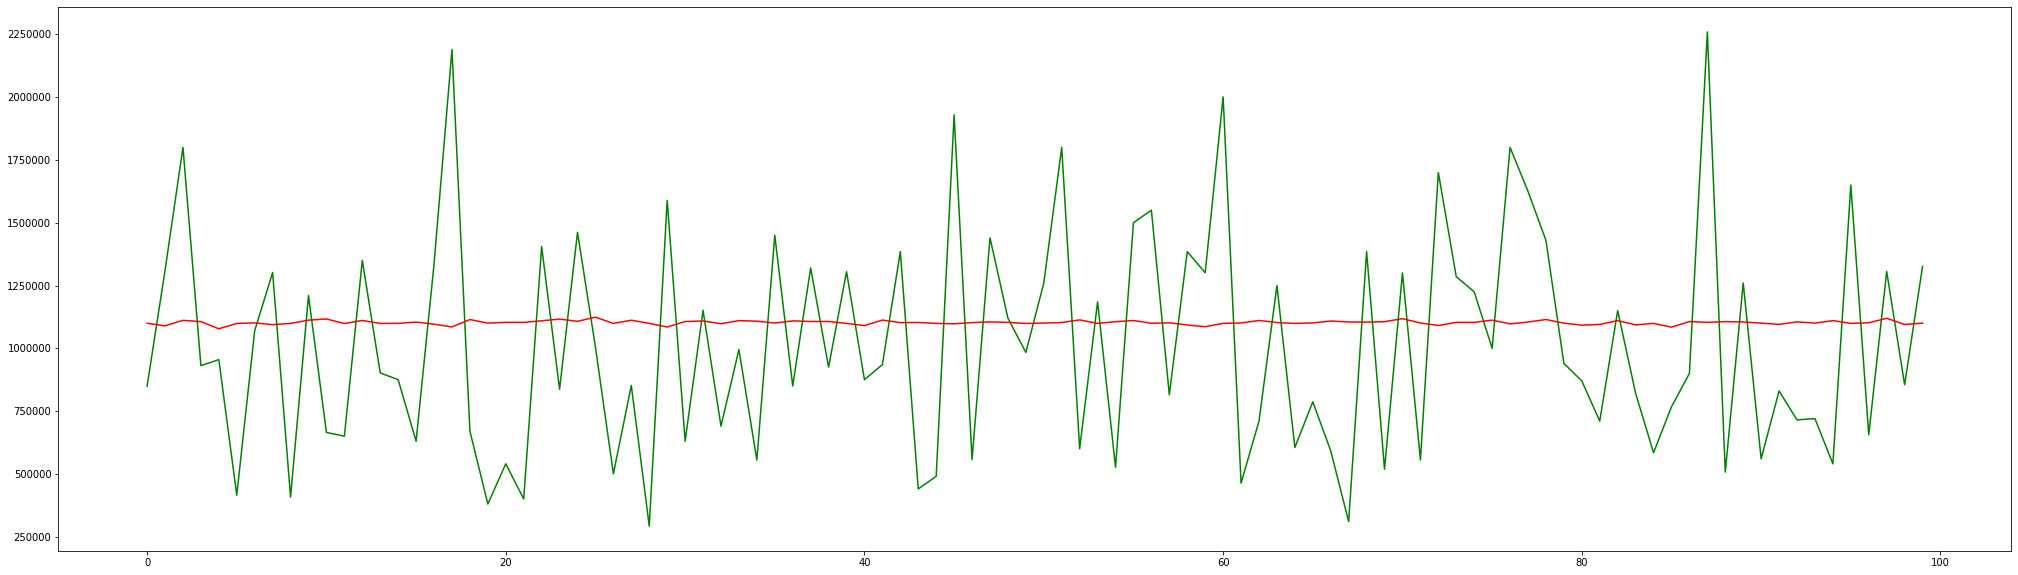

In [72]:
# This plot refers to the Non-linear logistic regression without cross validation.
plt.figure(figsize=(35,10))
plt.plot(T_test[:100],'g')
plt.plot(t_pred_ReLu[:100],'r')

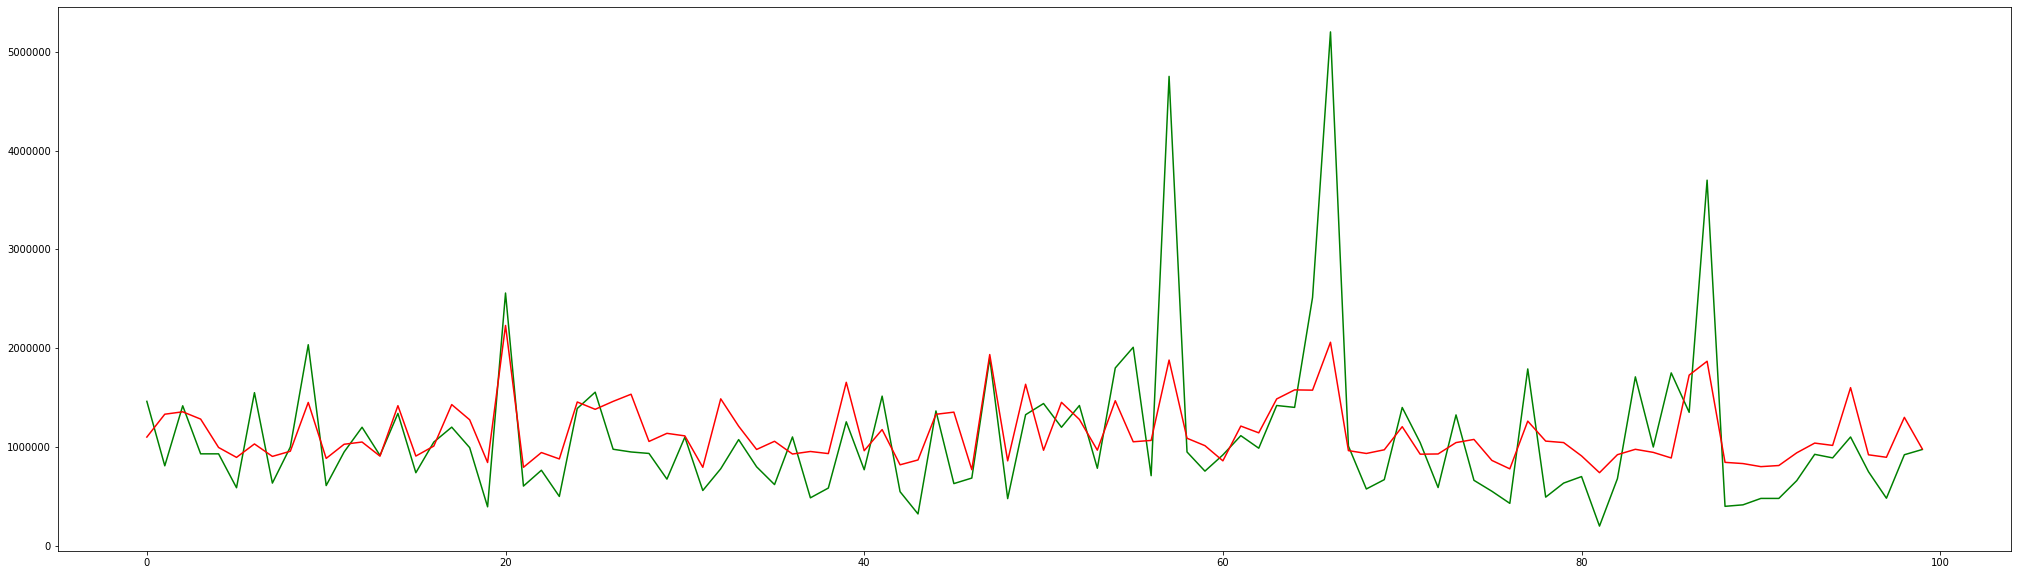

In [73]:
# This plot refers to the Non-linear regression with cross validation.
plt.figure(figsize=(35,10))
plt.plot(testSet_ReLu[:100],'g')
plt.plot(tPred_ReLu[:100],'r')

#### Non linear logistic regression using ReLu function

In [74]:
from nn import NeuralNet

class NeuralNetLogRegReLu(NeuralNetLogReg):
    """ Nonlinear Logistic Regression
    """

    def __init__(self, nunits):
        super().__init__(nunits)
 
    def ReLu(self,x):
        return np.maximum(x,0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLu(np.dot(self.add_ones(t), self._W[i]))
        return self.softmax(t), Z
    

In [75]:
logistic_data_ReLu = NeuralNetLogRegReLu([X_train_log.shape[1], 6, number_classes])

logistic_data_ReLu.train(X_train_log, T_train_log)
classes_data_ReLu, prob_ReLu = logistic_data_ReLu.use(X_test_log)

In [76]:
#Cross validation for Non-linear logistic regression
def crossValidation_logistic_ReLu(folds, X):
    XTrain, XTest, Train, TTest = split(X[:,:-1],X[:,-1:])
    number = int(XTrain.shape[0] / folds)
    param_grid = [{'optim': ['scg'], '_lambda': [.001, .01, .1, 1]} ]       # Making different combination of Hyperparameters
    grid = list(ParameterGrid(param_grid))  # Generating the list all possible combinations of hyperparameters
    
    hiddenUnits = [5, 10, XTrain.shape[1], 15, 20]
    
    arr_cv = []
    arr_test = []
    final_param = []
    test_index = []
    bestUnits = []
    for i in range(folds):
        print("     *********************Started the ",i+1," fold*************************\n      ")
        
        lower = number*i
        upper = number*(i+1)
        X_test, T_test = XTrain[lower:upper, :], Train[lower:upper, :] # Creating 1st fold as our test data
        XTrain_rem, Train_rem = np.delete(XTrain, np.s_[lower:upper], axis= 0), np.delete(Train, np.s_[lower:upper], axis= 0) #Deleting the test part and assogning the remaining part 
        
        grid_index = []
        arr_cv = []
        hunits = []
        for j in range(folds-1): # Iterating over next four folds and splitting for validation and training data
            low = number*j
            high = number*(j+1)
            X_validate, T_validate = XTrain_rem[low:high, :], Train_rem[low:high, :]
            XTrain_cv, Train_cv = np.delete(XTrain_rem, np.s_[low:high], axis= 0), np.delete(Train_rem, np.s_[low:high], axis= 0)
            
            for k in range(len(grid)): # Iterating over all the combnations of hyperparameters
                for units in range(len(hiddenUnits)):
                    nn_cv = NeuralNetLogRegReLu([XTrain.shape[1], hiddenUnits[units], Train.shape[1]+1])
                    nn_cv.train(XTrain_cv, Train_cv, **grid[k])
                    ypred_cv, G = nn_cv.use(X_validate)
                    arr_cv.append(100 - np.mean(np.abs(T_validate - ypred_cv) * 100))
                    grid_index.append(k)
                    hunits.append(hiddenUnits[units])

        minimum = arr_cv.index(max(arr_cv)) # Getting the index of minimum errors from array 
        min_index = grid_index[minimum] # Storing that index of best hyperparam. 
        best_hunit = hunits[minimum]
        print(" Best set of Hyperparameters: ", grid[min_index],"\n")
        print(" Best number of hidden units: ", best_hunit,"\n")
        
        
        nn_cv = NeuralNetLogRegReLu([XTrain.shape[1], best_hunit, Train.shape[1]+1])
        nn_cv.train(XTrain_rem, Train_rem, **grid[min_index])
        ypred_test, G = nn_cv.use(X_test)
        arr_test.append(100 - np.mean(np.abs(T_test - ypred_test) * 100)) # Calculating test error from best parameters from validation sets
        test_index.append(min_index) # Storing the corresponding index from grid_index with rmse
        bestUnits.append(best_hunit)
        print(" Test Accuracy for Test set: ",np.mean(np.abs(T_test - ypred_test) * 100) ,"\n")
            
    index= arr_test.index(max(arr_test)) # Storing the index of best hyperparameters after running onto all folds test cases.
    final_param = grid[test_index[index]]
    print("\n    Final Hyperparameters are:",final_param, "\n")
    final_units = bestUnits[index]
    print("      Final hidden units are:",final_units, "\n")
    
    nn_cv = NeuralNetLogRegReLu([XTrain.shape[1], final_units, Train.shape[1]+1])
    nn_cv.train(XTrain, Train, **final_param)
    ypred, G = nn_cv.use(XTest)
    
    print("      Final Accuracy after 5-fold cross validation: ",100 - np.mean(np.abs(TTest - ypred) * 100))
    return TTest, ypred, G

In [77]:
test_ReLu, Tpredicted_ReLu, G_ReLu = crossValidation_logistic_ReLu(5, df_classification_new.values)

     *********************Started the  1  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  15 

 Test Accuracy for Test set:  49.63058681303463 

     *********************Started the  2  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  5 

 Test Accuracy for Test set:  51.50478796169631 

     *********************Started the  3  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.01, 'optim': 'scg'} 

 Best number of hidden units:  14 

 Test Accuracy for Test set:  50.593699764765766 

     *********************Started the  4  fold*************************
      
 Best set of Hyperparameters:  {'_lambda': 0.001, 'optim': 'scg'} 

 Best number of hidden units:  10 

 Test Accuracy for Test set:  47.50384103630317 

     *********************Started the  5  fold***********************

### Plots

Accuracy:  50.36423795972277 %


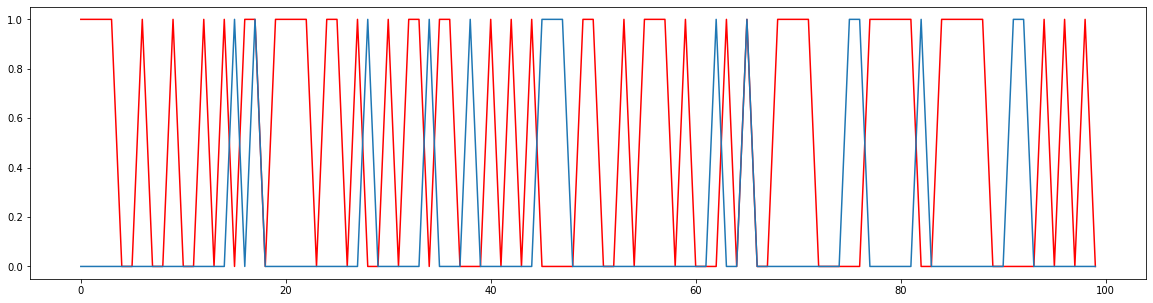

In [78]:
# Plotting first 100 points without cross validation
plt.figure(figsize=(20,5))
plt.plot(T_test_log[:100],'r')
plt.plot(classes_data_ReLu[:100])

print("Accuracy: ", 100 - np.mean(np.abs(T_test_log - classes_data_ReLu)) * 100, "%")

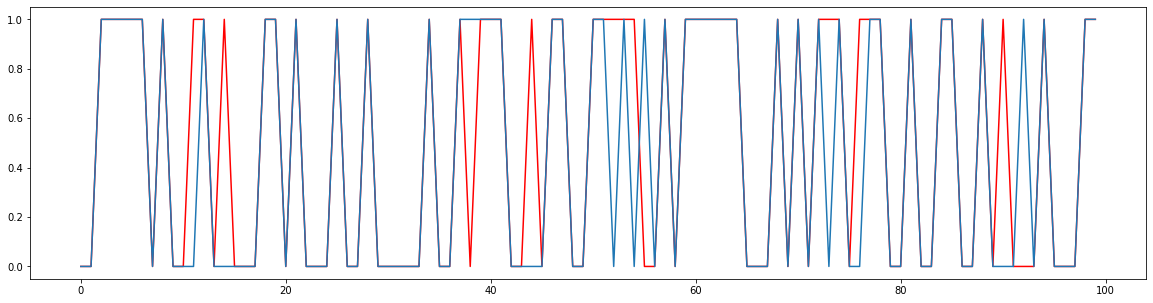

In [79]:
# Plotting first 100 points with cross validation.

plt.figure(figsize=(20,5))
plt.plot(test_ReLu[:100],'r')
plt.plot(Tpredicted_ReLu[:100])

# Summary of Results for Different Activation Functions

### Non-Linear Regression

Here are the results of RMSE Errors for models when ran with different activation functions. These errors are obtained after running 5-fold cross validation for each model.

<table style="width:50%">
  <tr>
    <th>Sigmoid</th>
    <th>Hyperbolic Tangent</th> 
    <th>ReLU</th>
  </tr>
  <tr>
    <td>447552.66</td>
    <td>300667.77</td> 
    <td>530414.60</td>
</table>

### Non-Linear Logistic Regression

Here are the results of Maximum Accuracy for models when ran with different activation functions. These accuracies are obtained after running 5-fold cross validation for each model.

<table style="width:50%">
  <tr>
    <th>Sigmoid</th>
    <th>Hyperbolic Tangent</th> 
    <th>ReLU</th>
  </tr>
  <tr>
    <td>49.09 %</td>
    <td>50.10 %</td> 
    <td>50.20 %</td>
</table>

### Conclusion on extra analysis done using other activation functions

**Activation Functions**: Activation functions are the primary reason for the non-linearity in our model. We have also learned and tested three main activation functions on both of our algorithms.
    1. Sigmoid Function.
    2. Hyperbolic Tangent.
    3. ReLu.
    
We tested the results through cross validation and hyperparameter tuning as well as directly run on complete dataset. we observe that **Hyperbolic Tangent** performs better on our regression dataset out of all with our tuning parameters while all functions perform equally in classification dataset with accuracy close to 50% with parameters we tested on. These results are not fixed and could vary differently on different datasets and most importantly with the variation in hyperparmeter setting.